In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

from pandas import read_csv
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100

from UCLA.core.constants import *

### Load Exp data

In [2]:
Ar_data = read_csv("../../data/experimental_data/Ar_25bar_Te.txt", delim_whitespace=True, header=1)
# Ar_FWHM_data = read_csv("./data/experimental_data/Ar_5bar_FWHM.txt", delim_whitespace=True, header=1)


In [3]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def make_exp_plot():
    fig, ax = plt.subplots(figsize=(10,8), facecolor='white')
    fig.suptitle("Full Experimental Fit and Simulation in Ar at 25 bar", fontsize=20)

    dense_t_list = np.linspace(0,18,num=100)


    #Data and fit
    ax.plot(Ar_data['t[ns]'], Ar_data['T[kK]'], 'r--.', label='Experiment Data')

    ax.set_ylabel(r'$T_e$ [kK]', fontsize=20, color='r')
    ax.set_xlabel('t [ns]', fontsize=20)
    # ax.set_xlim(0,12)

    # ax.set_ylim(40,60)
    ax.tick_params(labelsize=20)
    ax.tick_params(axis='y',color='r', labelcolor='r')

    ax2 = ax.twinx()
    # Plot FWHM
    #Data and fit
    # ax2.plot(Ar_FWHM_data['t[ns]'], Ar_FWHM_data['FWHM[μm]'], 'k--.', label='Experiment Data')

    ax2.set_ylabel(r'$\langle Z \rangle', fontsize=20)
    ax2.tick_params(labelsize=20)
    # ax.set_xscale('log')
    # ax2.set_yscale('log')
    # ax2.set_ylim(40,70)
    ax.set_ylim(10,19)

    # legend_elements = [Line2D([0], [0], color='r', lw=2, label='Experimental Fit',linestyle='--'),
    #                    Line2D([0], [0], marker='x', color='r', label='Exerimental Data',
    #                           markerfacecolor='r', markersize=8,linewidth=0),
    #                    Line2D([0], [0], marker='.', color='r', label='Simulation Output',
    #                           markerfacecolor='r', markersize=8,linewidth=0),
    #                    Line2D([0], [0], color='r', lw=2, label='Simulation Fit', linestyle='-')]

    ax.legend(loc='upper left')
    axs = [ax,ax2]
    return fig, axs

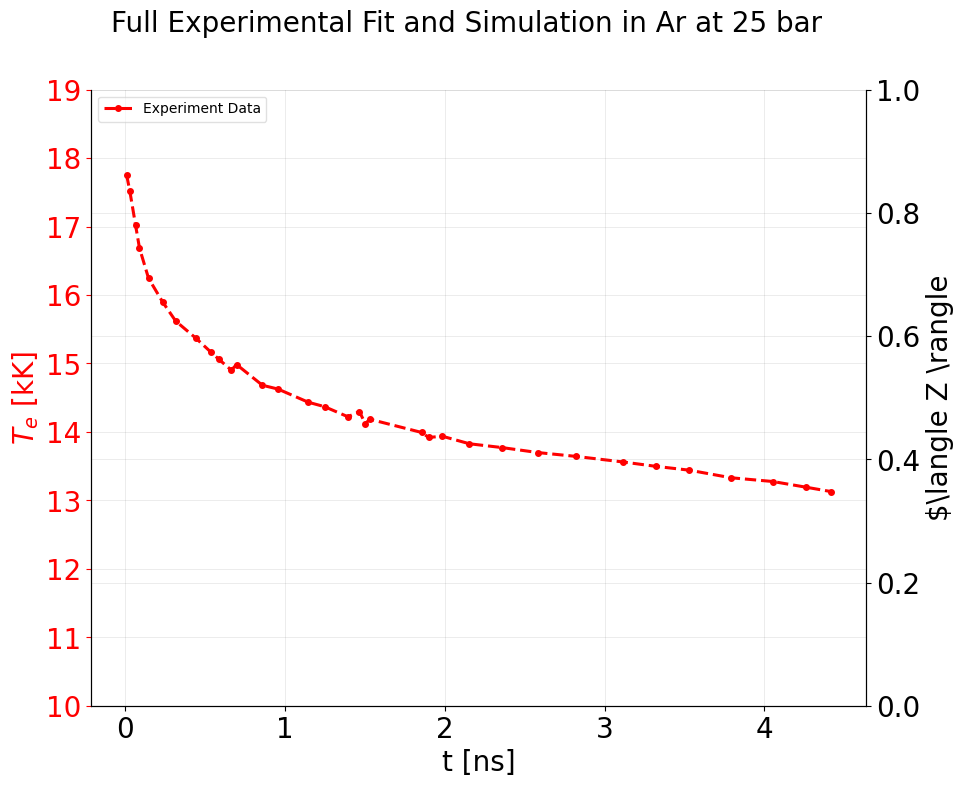

In [4]:
fig, axs = make_exp_plot()

In [5]:
from scipy.interpolate import interp1d 
my_TF_data = [[13000.        , 13194.55099261, 13392.0135305 , 13592.4311863 ,
        13795.8481847 , 14002.30941225, 14211.86042725, 14424.54746978,
        14640.41747194, 14859.5180682 , 15081.89760588, 15307.60515585,
        15536.69052335, 15769.20425898, 16005.19766984, 16244.72283088,
        16487.83259637, 16734.58061157, 16985.02132455, 17239.20999826,
        17497.20272264, 17759.05642706, 18024.82889288, 18294.57876616,
        18568.36557065, 18846.24972087, 19128.29253549, 19414.55625085,
        19705.10403466, 20000.        ],[0.3565544981219233,
  0.38330884012640354,
  0.39136148193499665,
  0.3998818397470494,
  0.4080345791304154,
  0.4166149965916155,
  0.4250701777952415,
  0.4335782408318565,
  0.442407672750015,
  0.4511074615774575,
  0.4602445335120997,
  0.4690662718385177,
  0.47800885267066917,
  0.48713401063595896,
  0.4963494235559942,
  0.5042546632546205,
  0.5136383325651188,
  0.5232315599633921,
  0.5328157002331224,
  0.5427378375451326,
  0.5525481272836963,
  0.5625485049517174,
  0.5724927642500717,
  0.5825862930727688,
  0.5928227746349926,
  0.6031916468233796,
  0.613572219622359,
  0.6241482863886354,
  0.6348448760989278,
  0.6455825233744577]
 ]

myTFAA_Zbar_func = interp1d(my_TF_data[0], my_TF_data[1], fill_value='extrapolate',bounds_error=False)

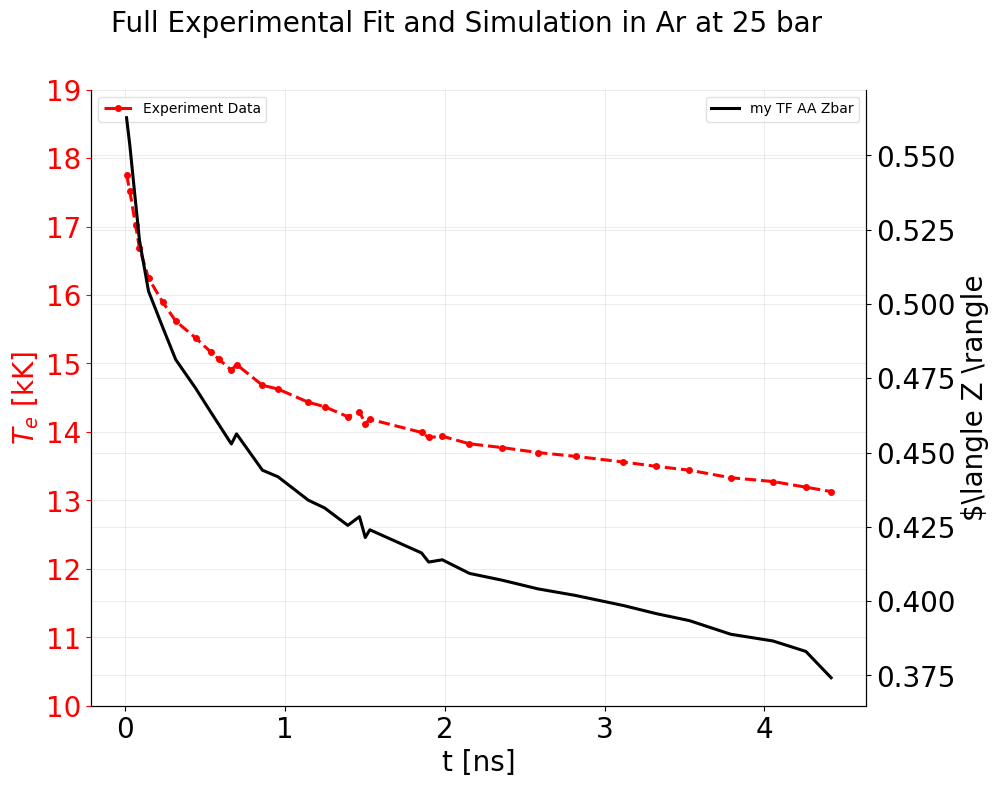

In [6]:
fig, axs = make_exp_plot()

axs[1].plot(Ar_data['t[ns]'], myTFAA_Zbar_func(Ar_data['T[kK]']*1e3), 'k', label='my TF AA Zbar')

axs[1].legend()

In [7]:
Saha_Tk_array = np.array([ 1000.        ,  1047.61575279,  1097.49876549,  1149.7569954 ,
         1204.50354026,  1261.85688307,  1321.94114847,  1384.88637139,
         1450.8287785 ,  1519.91108295,  1592.28279334,  1668.1005372 ,
         1747.52840001,  1830.7382803 ,  1917.91026167,  2009.23300257,
         2104.90414451,  2205.1307399 ,  2310.12970008,  2420.12826479,
         2535.36449397,  2656.08778295,  2782.55940221,  2915.05306283,
         3053.85550883,  3199.2671378 ,  3351.60265094,  3511.19173422,
         3678.37977183,  3853.52859371,  4037.0172586 ,  4229.24287439,
         4430.62145758,  4641.58883361,  4862.60158007,  5094.13801482,
         5336.69923121,  5590.81018251,  5857.02081806,  6135.90727341,
         6428.07311728,  6734.15065775,  7054.80231072,  7390.72203353,
         7742.63682681,  8111.3083079 ,  8497.53435909,  8902.15085445,
         9326.03346883,  9770.09957299, 10235.31021899, 10722.6722201 ,
        11233.24032978, 11768.11952435, 12328.46739442, 12915.49665015,
        13530.4777458 , 14174.74162927, 14849.68262254, 15556.7614393 ,
        16297.50834621, 17073.52647471, 17886.49529057, 18738.1742286 ,
        19630.4065004 , 20565.12308349, 21544.34690032, 22570.19719634,
        23644.89412645])
Saha_Zbar_array = np.array([8.61921019e-09, 8.62609126e-09, 8.62622732e-09, 8.62623315e-09,
        8.62623352e-09, 8.62623355e-09, 8.62623355e-09, 8.62623355e-09,
        8.62623355e-09, 8.62623355e-09, 8.62623355e-09, 8.62623355e-09,
        8.62623355e-09, 8.62623355e-09, 8.62623355e-09, 8.62623355e-09,
        8.62623355e-09, 8.62623355e-09, 8.62623355e-09, 8.62623355e-09,
        8.62623355e-09, 8.62623355e-09, 8.62623355e-09, 8.62623355e-09,
        8.62623356e-09, 8.62623361e-09, 8.62623438e-09, 8.62624417e-09,
        8.62635571e-09, 8.62749548e-09, 8.63798937e-09, 8.72514089e-09,
        9.39316877e-09, 1.31585794e-08, 2.69092675e-08, 6.24689822e-08,
        1.44700035e-07, 3.25937649e-07, 7.10896868e-07, 1.50126337e-06,
        3.07248973e-06, 6.10224327e-06, 1.17777665e-05, 2.21217627e-05,
        4.04905945e-05, 7.23168010e-05, 1.26189760e-04, 2.15393511e-04,
        3.60049513e-04, 5.90043387e-04, 9.48946815e-04, 1.49917905e-03,
        2.32868261e-03, 3.55941822e-03, 5.35801629e-03, 7.94897292e-03,
        1.16308820e-02, 1.67964250e-02, 2.39573459e-02, 3.37767003e-02,
        4.71128443e-02, 6.50841077e-02, 8.91726210e-02, 1.21407466e-01,
        1.64722120e-01, 2.23739352e-01, 3.06770508e-01, 4.31699547e-01,
        6.25059935e-01])
Saha_χ_array = 12.1298437 - 27.211383859999998*np.array([5.62540937e-05, 5.49827591e-05, 5.37191256e-05, 5.24841383e-05,
        5.12775268e-05, 5.00986544e-05, 4.89468842e-05, 4.78215932e-05,
        4.67221728e-05, 4.56480280e-05, 4.45985779e-05, 4.35732547e-05,
        4.25715037e-05, 4.15927830e-05, 4.06365632e-05, 3.97023268e-05,
        3.87895687e-05, 3.78977948e-05, 3.70265229e-05, 3.61752816e-05,
        3.53436103e-05, 3.45310592e-05, 3.37371886e-05, 3.29615692e-05,
        3.22037814e-05, 3.14634152e-05, 3.07400713e-05, 3.00333728e-05,
        2.93430940e-05, 2.86703890e-05, 2.80282873e-05, 2.75217233e-05,
        2.78994252e-05, 3.22623113e-05, 4.50756173e-05, 6.70999245e-05,
        9.97753335e-05, 1.46303678e-04, 2.11101111e-04, 2.99719616e-04,
        4.18920832e-04, 5.76809573e-04, 7.82928060e-04, 1.04834923e-03,
        1.38574764e-03, 1.80944921e-03, 2.33546268e-03, 2.98149629e-03,
        3.76697101e-03, 4.71304823e-03, 5.84269831e-03, 7.18085693e-03,
        8.75473495e-03, 1.05943850e-02, 1.27336740e-02, 1.52118808e-02,
        1.80762366e-02, 2.13858742e-02, 2.52178876e-02, 2.96766082e-02,
        3.49079565e-02, 4.11222490e-02, 4.86321369e-02, 5.79201083e-02,
        6.97701956e-02, 8.55586769e-02, 1.08010074e-01, 1.43557567e-01,
        2.04089828e-01])

Saha_Zbar_func = interp1d(Saha_Tk_array, Saha_Zbar_array, fill_value='extrapolate',bounds_error=False)
Saha_χ_func    = interp1d(Saha_Tk_array, Saha_χ_array, fill_value='extrapolate',bounds_error=False)

In [8]:
np.array(Ar_data['t[ns]'])

array([0.00809717, 0.02834008, 0.06477733, 0.08906883, 0.14574899,
       0.23481781, 0.31578947, 0.44129555, 0.53441296, 0.58704453,
       0.66396761, 0.69635628, 0.8582996 , 0.95546559, 1.14574899,
       1.24696356, 1.39271255, 1.46558704, 1.50202429, 1.53036437,
       1.85425101, 1.89878543, 1.98380567, 2.15384615, 2.3562753 ,
       2.58299595, 2.81781377, 3.11740891, 3.32388664, 3.53036437,
       3.78947368, 4.05263158, 4.25910931, 4.41700405])

In [9]:
myTFAA_Zbar_func(Ar_data['T[kK]']*1e3),Saha_Zbar_func(Ar_data['T[kK]']*1e3),Saha_χ_func(Ar_data['T[kK]']*1e3),

(array([0.56262233, 0.5534974 , 0.53404618, 0.52132966, 0.50424682,
        0.49205488, 0.48125819, 0.47155358, 0.46365351, 0.45929647,
        0.45287651, 0.45627531, 0.4440582 , 0.44185226, 0.43395765,
        0.4313756 , 0.42549285, 0.42843423, 0.4214171 , 0.42401309,
        0.41621343, 0.41315759, 0.41392155, 0.40933779, 0.40708113,
        0.40413415, 0.40192391, 0.39853123, 0.39579601, 0.39345155,
        0.38886852, 0.38661959, 0.38309757, 0.37424988]),
 array([0.08545503, 0.07837426, 0.06376449, 0.05610182, 0.04615824,
        0.0398702 , 0.03490596, 0.03120148, 0.02839341, 0.02686173,
        0.02469185, 0.02584061, 0.02217813, 0.02159303, 0.01954521,
        0.0188626 , 0.01730235, 0.01808247, 0.01636813, 0.01691228,
        0.01533644, 0.0147469 , 0.01489428, 0.01400997, 0.01356782,
        0.01297828, 0.01253612, 0.01187289, 0.0114264 , 0.01109623,
        0.0104359 , 0.01010573, 0.00961048, 0.00922529]),
 array([10.83803408, 10.89810366, 11.02326723, 11.09536869, 11.19013

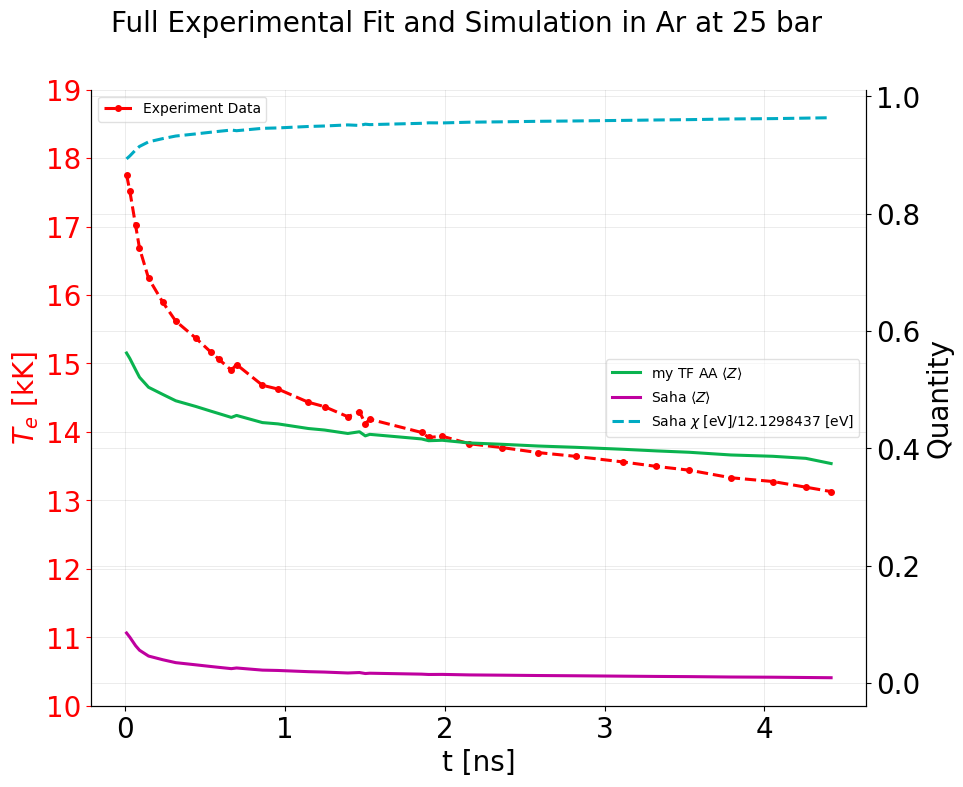

In [10]:
fig, axs = make_exp_plot()

axs[1].plot(Ar_data['t[ns]'], myTFAA_Zbar_func(Ar_data['T[kK]']*1e3)/1, '-', label=r'my TF AA $\langle Z\rangle$')
axs[1].plot(Ar_data['t[ns]'], Saha_Zbar_func(Ar_data['T[kK]']*1e3)/1, '-', label=r'Saha $\langle Z\rangle$')
axs[1].plot(Ar_data['t[ns]'], Saha_χ_func(Ar_data['T[kK]']*1e3)/12.1298437, '--', label=r'Saha $\chi$ [eV]/12.1298437 [eV]')

axs[1].set_ylabel('Quantity')
axs[1].legend()

# plt.savefig('media/Xenon5bar_Zbar_χ_over_Experiment.png', dpi=400)